In [117]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [118]:
import numpy as np
import matplotlib.pyplot as plt
np.random.seed(0)

In [119]:
import os

img_folder = 'imgs'
if not os.path.exists(img_folder):
    os.makedirs(img_folder)

## Optional Question 1: Perceptron Coding 2

### preamble:
<font size="3">First load the separable dataset of 200 instances of 2D-features. </font>

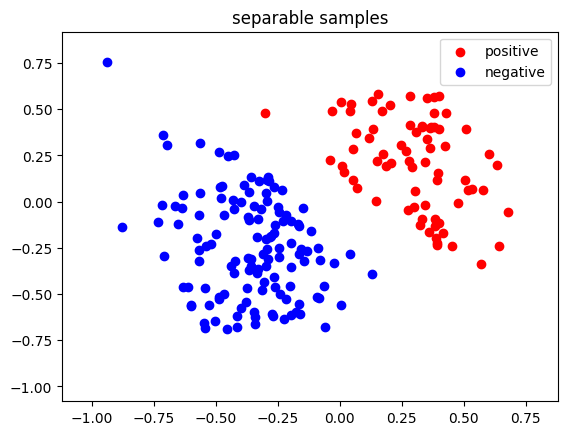

In [120]:
from utils import plot_samples

# load the dataset
data_q1_separable = np.load('datasets/q1_separable.npz')
separable_x = data_q1_separable['x']
separable_y = data_q1_separable['y']

# visualize the datapoints
fig, ax = plt.subplots(1)
plot_samples(ax, separable_x, separable_y, 'separable samples', legend=True)

### Perceptron Algorithm without Maximizing the Margin
<font size="3"> **Q1(a)** The basic perceptron algorithm is already implemented. Complete all TODO part in q1.py marked as 'Q1(a)' to implement the computation of geometric margin. </font>

In [121]:
from q1 import perceptron_algo

geom_margins = []
result = perceptron_algo(separable_x, separable_y, N_iters=10, geom_margins=geom_margins)

max margin: 0.0


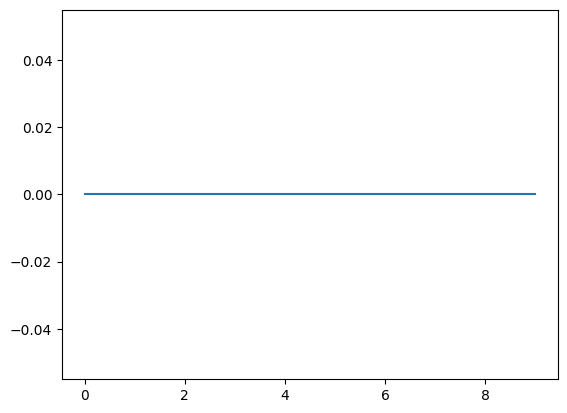

In [122]:
plt.plot(geom_margins)
print(f'max margin: {geom_margins[-1]}')
plt.savefig(os.path.join(img_folder, 'Q1_a.png'))

<font size="3"> **[Question]**: after how many iterations does the decision boundary stop updating?
<br> **[Answer]**: 
</font>

#### Q1(b) Margin Perceptron Algorithm

<font size="3"> In this section, please complete the margin perceptron algorithm (TODO marked as 'Q1(b)' in q1.py). After you have completed the task, run the block below and answer the question. </font>

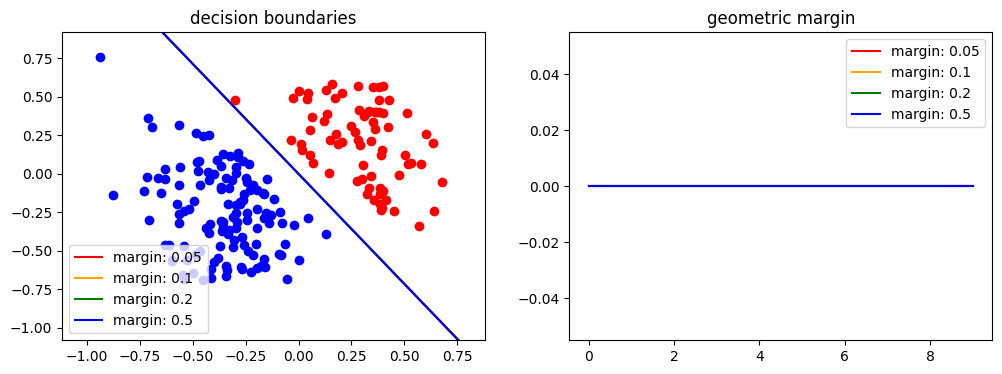

In [123]:
from utils import plot_line

fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plot_samples(axs[0], separable_x, separable_y, 'decision boundaries')
axs[1].set_title('geometric margin')
margins = [0.05, 0.1, 0.2, 0.5]
colors = ['red', 'orange', 'green', 'blue']
for margin, color in zip(margins, colors):
    geom_margins = []
    result = perceptron_algo(separable_x, separable_y, N_iters=10, geom_margins=geom_margins, margin=margin)
    plot_line(axs[0], label=f'margin: {margin}', color=color, weights=result)
    axs[1].plot(geom_margins, label=f'margin: {margin}', c=color)
axs[0].legend()
axs[1].legend()
plt.savefig(os.path.join(img_folder, 'Q1_b.png'))

<font size="3"> **[Question]**: Briefly discuss and explain the impact of $\gamma$ on the resulting margin.
<br> **[Answer]**: 
</font>

### Q1(c)  Variable-Increment Perceptron

<font size="3"> In this section, please complete the variant-increment perceptron algorithm (TODO marked as 'Q1(c)' in q1.py). After you have completed the task, run the block below and answer the question. </font>

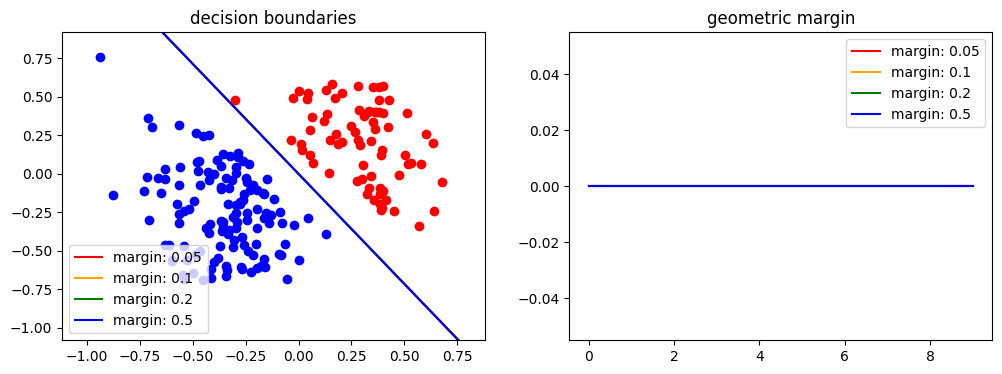

In [124]:
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plot_samples(axs[0], separable_x, separable_y, 'decision boundaries')
axs[1].set_title('geometric margin')
margins = [0.05, 0.1, 0.2, 0.5]
colors = ['red', 'orange', 'green', 'blue']
for margin, color in zip(margins, colors):
    geom_margins = []
    result = perceptron_algo(
        separable_x, separable_y, N_iters=10, geom_margins=geom_margins, 
        margin=margin, variable_increment=True)
    plot_line(axs[0], label=f'margin: {margin}', color=color, weights=result)
    axs[1].plot(geom_margins, label=f'margin: {margin}', c=color)
axs[0].legend()
axs[1].legend()
plt.savefig(os.path.join(img_folder, 'Q1_c.png'))

<font size="3"> **[Question]**: What step size $\eta_i$ you use for each sample $x_i$. Explain how these step sizes satisfy the properties that guarantee a solution with the margin $\frac{\gamma}{2}$ on $\gamma$-linearly separable dataset.
<br> **[Answer]**: 
</font>

<font size="3"> **[Question]**: Compare the result with the result obtained in (b). Describe and explain the difference.
<br> **[Answer]**: 
</font>

### Data that are not linearly separable

<font size="3"> We will use a not linearly separable dataset with offset for Q1(d) </font>

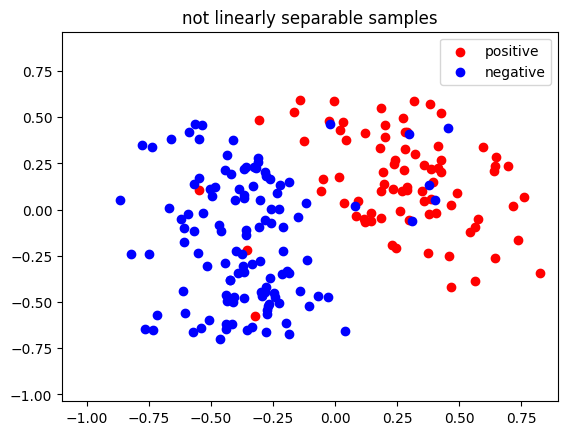

In [125]:
# load the sparable samples
data_q1_not_separable = np.load('datasets/q1_non_separable.npz')
not_separable_x = data_q1_not_separable['x']
not_separable_y = data_q1_not_separable['y']

# visualize the datapoints
fig, ax = plt.subplots(1)
plot_samples(ax, not_separable_x, not_separable_y, 'not linearly separable samples', legend=True)

### Q1(d) Batch Variable-Increment Perceptron
<font size="3"> In this section, please complete the batch perceptron algorithm (TODO marked as 'Q1(d)' in q1.py). After you have completed the task, run the block below and answer the question. Boundary lines of darker color are generated in later iterations. </font>

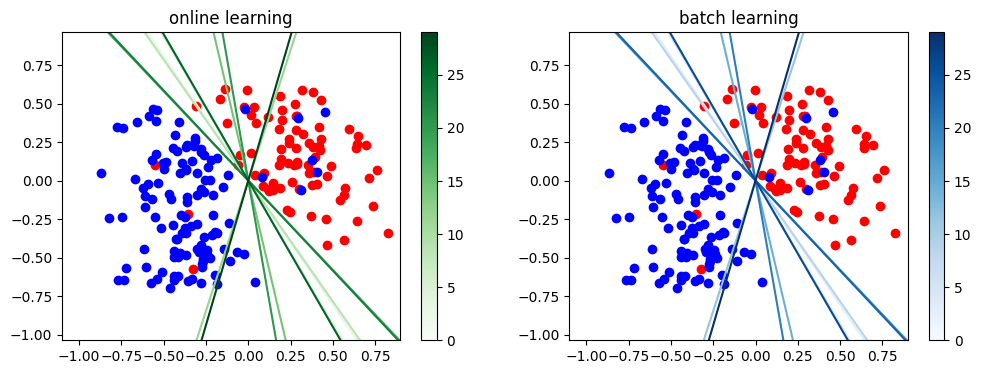

In [126]:
import matplotlib as mpl
import matplotlib.cm as cm
fig, axs = plt.subplots(1, 2, figsize=(12, 4))
plot_samples(axs[0], not_separable_x, not_separable_y, 'online learning')
plot_samples(axs[1], not_separable_x, not_separable_y, 'batch learning')
theta_online = None
theta_batch = None

N_iters = 10
interval = 3
online_cmap = plt.get_cmap('Greens')
batch_cmap = plt.get_cmap('Blues')
for iter in range(N_iters):
    theta_online = perceptron_algo(
        not_separable_x, not_separable_y, N_iters=interval, geom_margins=[], 
        initial_weights=theta_online)
    theta_batch = perceptron_algo(
        not_separable_x, not_separable_y, N_iters=interval, geom_margins=[],
        initial_weights=theta_batch, batch=True)
    plot_line(axs[0], color=online_cmap((iter+1)/N_iters), weights=theta_online)
    plot_line(axs[1], color=batch_cmap((iter+1)/N_iters), weights=theta_batch)
fig.colorbar(cm.ScalarMappable(
    norm=mpl.colors.Normalize(vmin=0, vmax=N_iters*interval-1), cmap=online_cmap), ax=axs[0])
fig.colorbar(cm.ScalarMappable(
    norm=mpl.colors.Normalize(vmin=0, vmax=N_iters*interval-1), cmap=batch_cmap), ax=axs[1])
plt.savefig(os.path.join(img_folder, 'Q1_d.png'))

<font size="3"> **[Question]**: Compare the results obtained using batch learning and online learning. Briefly explain the reason.
<br> **[Answer]**: 
</font>

<font size="3"> **[Question]**: If batch learning is not available, is there any other tricks that might mitigate the oscillation?
<br> **[Answer]**: 
</font>